In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
df=pd.read_csv('/content/wine classification.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [35]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0


In [37]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.52,0.82,9.5,6.0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.52,0.66,11.0,6.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1360 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1360 non-null   float64
 1   volatile acidity      1360 non-null   float64
 2   citric acid           1360 non-null   float64
 3   residual sugar        1360 non-null   float64
 4   chlorides             1360 non-null   float64
 5   free sulfur dioxide   1360 non-null   float64
 6   total sulfur dioxide  1360 non-null   float64
 7   density               1360 non-null   float64
 8   pH                    1360 non-null   float64
 9   sulphates             1360 non-null   float64
 10  alcohol               1360 non-null   float64
 11  quality               1360 non-null   float64
dtypes: float64(12)
memory usage: 138.1 KB


In [14]:
print("missing values:")
df.isnull().sum()

missing values:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
print("duplicateed rows")
df.duplicated().sum()

duplicateed rows
239


In [7]:
print("removing duplicates")
df.drop_duplicates(inplace=True)

removing duplicates


In [9]:
print("now we are replacing the missing values with mean")
df.fillna(df.mean(),inplace=True)

now we are replacing the missing values with mean


In [13]:
print("duplicateed rows are remove successfully")
df.duplicated().sum()

duplicateed rows are remove successfully


0

In [12]:
print("statistics")
df.describe()

statistics


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1360.00000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000
mean,8.31000,0.529456,0.272397,2.526029,0.088111,15.894118,46.825975,0.996710,3.497704,0.658809,10.432365,5.623252
std,1.73649,0.182966,0.195479,1.355291,0.049361,10.443469,33.396652,0.001868,0.081589,0.170647,1.081669,0.823275
min,4.60000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.10000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.90000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.520000,0.620000,10.200000,6.000000
75%,9.20000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.520000,0.730000,11.100000,6.000000
max,15.90000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


checking correlation


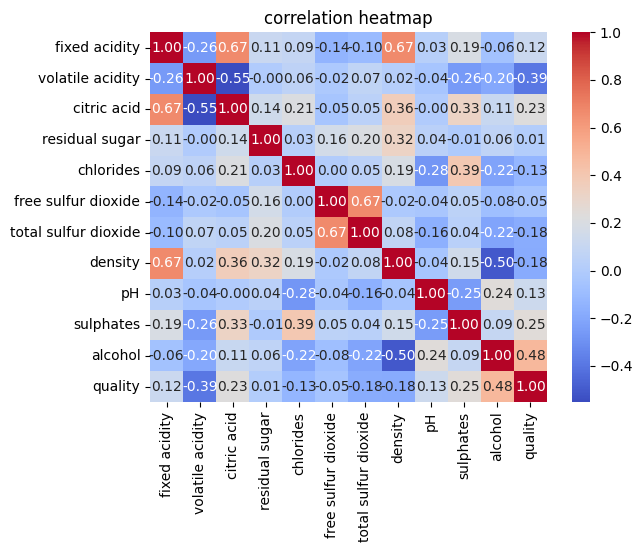

In [15]:
print("checking correlation")
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation heatmap')
plt.show()

wine quality


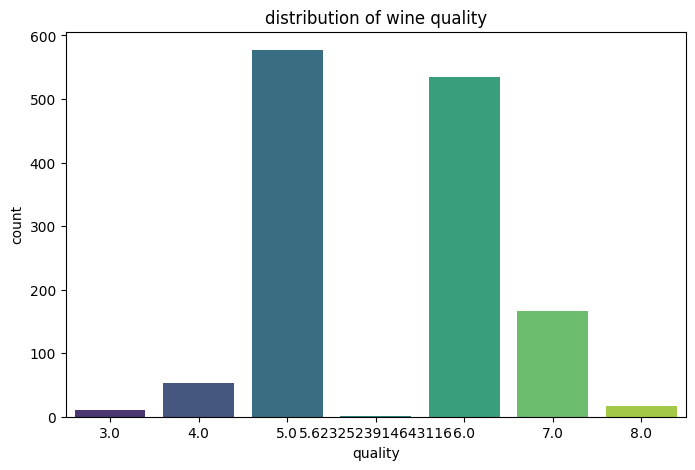

In [17]:
print("wine quality")
plt.figure(figsize=(8,5))
sns.countplot(x='quality',data=df,palette='viridis')
plt.title("distribution of wine quality")
plt.xlabel("quality")
plt.ylabel("count")
plt.show()

In [19]:
print("splitting data for analysis")
x=df.drop(['quality'],axis=1)
y=df['quality']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

splitting data for analysis


In [20]:
print("isolation forest model")
model=IsolationForest(contamination=0.05,random_state=42)
outlier_predictions=model.fit_predict(x_train)

isolation forest model


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [51]:
eva_df = pd.DataFrame({'y_true': y_train, 'outlier_predictions': outlier_predictions})

In [54]:
print("setting inliers to 0 and outliers to 1")
eva_df['outlier_predictions'][eva_df['outlier_predictions']==1] = 0
eva_df['outlier_predictions'][eva_df['outlier_predictions']==-1] = 1

setting inliers to 0 and outliers to 1


<ipython-input-54-a6f6bb5131d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eva_df['outlier_predictions'][eva_df['outlier_predictions']==1] = 0
<ipython-input-54-a6f6bb5131d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eva_df['outlier_predictions'][eva_df['outlier_predictions']==-1] = 1


In [53]:
print("regression evaluation:")
print(f"Mean Absolute Error: {mean_absolute_error(eva_df['y_true'], eva_df['outlier_predictions']):.4f}")
print(f"Mean Squared Error: {mean_squared_error(eva_df['y_true'], eva_df['outlier_predictions']):.4f}")
print(f"R^2 Score: {r2_score(eva_df['y_true'], eva_df['outlier_predictions']):.4f}")

regression evaluation:
Mean Absolute Error: 5.5805
Mean Squared Error: 31.8838
R^2 Score: -45.9369


In [25]:
wine_data = df.drop_duplicates()

In [23]:
columns_for_analysis = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                         'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [33]:
data_for_analysis = wine_data[columns_for_analysis]

In [27]:
# Fit the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(data_for_analysis)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05, random_state=42)

In [28]:
outlier_predictions = model.predict(data_for_analysis)

In [29]:
wine_data['outlier'] = outlier_predictions

In [30]:
outliers = wine_data[wine_data['outlier'] == -1]
print("Outliers (Potentially Excellent or Poor Wines):")
display(outliers)

Outliers (Potentially Excellent or Poor Wines):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,outlier
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5.0,-1
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5.0,-1
17,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5.0,-1
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6.0,-1
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,8.7,0.780,0.51,1.7,0.415,12.0,66.0,0.99623,3.52,1.17,9.2,5.0,-1
1434,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.52,0.77,9.0,6.0,-1
1474,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.52,0.75,8.8,5.0,-1
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.52,0.56,9.5,5.0,-1


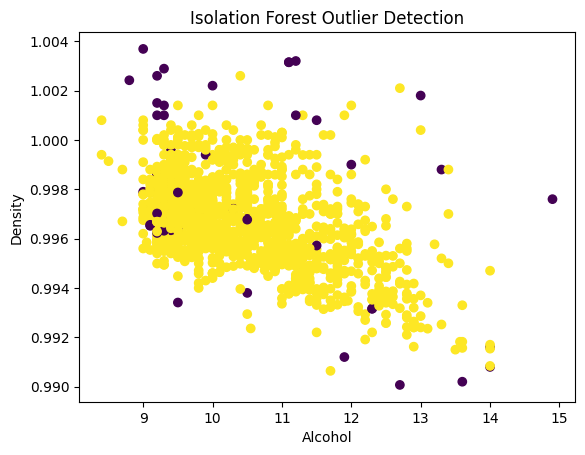

In [31]:
plt.scatter(data_for_analysis['alcohol'], data_for_analysis['density'], c=outlier_predictions, cmap='viridis')
plt.title('Isolation Forest Outlier Detection')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.show()